# A Deep Neural Network for Estimating Low-Density Lipoprotein Cholesterol From Electronic Health Records: Real-Time Routine Clinical Application
## Abstract
### Background
Previously, we constructed a deep neural network (DNN) model to estimate low-density lipoprotein cholesterol (LDL-C).  
### Objective
To routinely provide estimated LDL-C levels, we applied the aforementioned DNN model to an electronic health record (EHR) system in real time (deep LDL-EHR).

### Methods
The Korea National Health and Nutrition Examination Survey and the Wonju Severance Christian Hospital (WSCH) datasets were used as training and testing datasets, respectively. We measured our proposed model’s performance by using 5 indices, including bias, root mean-square error, P10-P30, concordance, and correlation coefficient. For transfer learning (TL), we pretrained the DNN model using a training dataset and fine-tuned it using 30% of the testing dataset.

### Results
Based on 5 accuracy criteria, deep LDL-EHR generated inaccurate results compared with other methods for LDL-C estimation. By comparing the training and testing datasets, we found an overfitting problem. We then revised the DNN model using the TL algorithms and randomly selected subdata from the WSCH dataset. Therefore, the revised model (DNN+TL) exhibited the best performance among all methods.

### Conclusions
Our DNN+TL is expected to be suitable for routine real-time clinical application for LDL-C estimation in a clinical laboratory.

## Full-text
[Paper](https://medinform.jmir.org/2021/8/e29331)

## What to do ?
1. Change the Pytorch to Tensorflow
2. Implement flask app to predict
3. Pre-train using real data of the Wonju Severance Christian Hospital (WSCH)

In [1]:
import tensorflow as tf
from IPython.display import Image

In [2]:
data_list = {  # example fake data
    "x": [
        [199, 84, 64],  # total-cholesterol, HDL-cholesterol, triglyceride
        [190, 35, 58]
    ],
    "y": [
        [109],  # LDL-cholesterol
        [112]
    ]
}

## Build model

In [3]:
"""
build model
1. keras input layer (3)
2. 6 kears Dense layers (30) -> use relu activation
3. keras Dense layer (1) -> output
"""
inputs = tf.keras.layers.Input([3], dtype=tf.float64)
hidden = inputs
for i in range(6):
    hidden = tf.keras.layers.Dense(30, activation="relu")(hidden)
outputs = tf.keras.layers.Dense(1)(hidden)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense (Dense)               (None, 30)                120       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 30)                930       
                                                                 
 dense_3 (Dense)             (None, 30)                930       
                                                                 
 dense_4 (Dense)             (None, 30)                930       
                                                                 
 dense_5 (Dense)             (None, 30)                930   

2022-07-14 10:15:29.964663: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Result

### Compare with other formula
There is classical way to calculate LDL-C using same data:  
- Friedewald equation

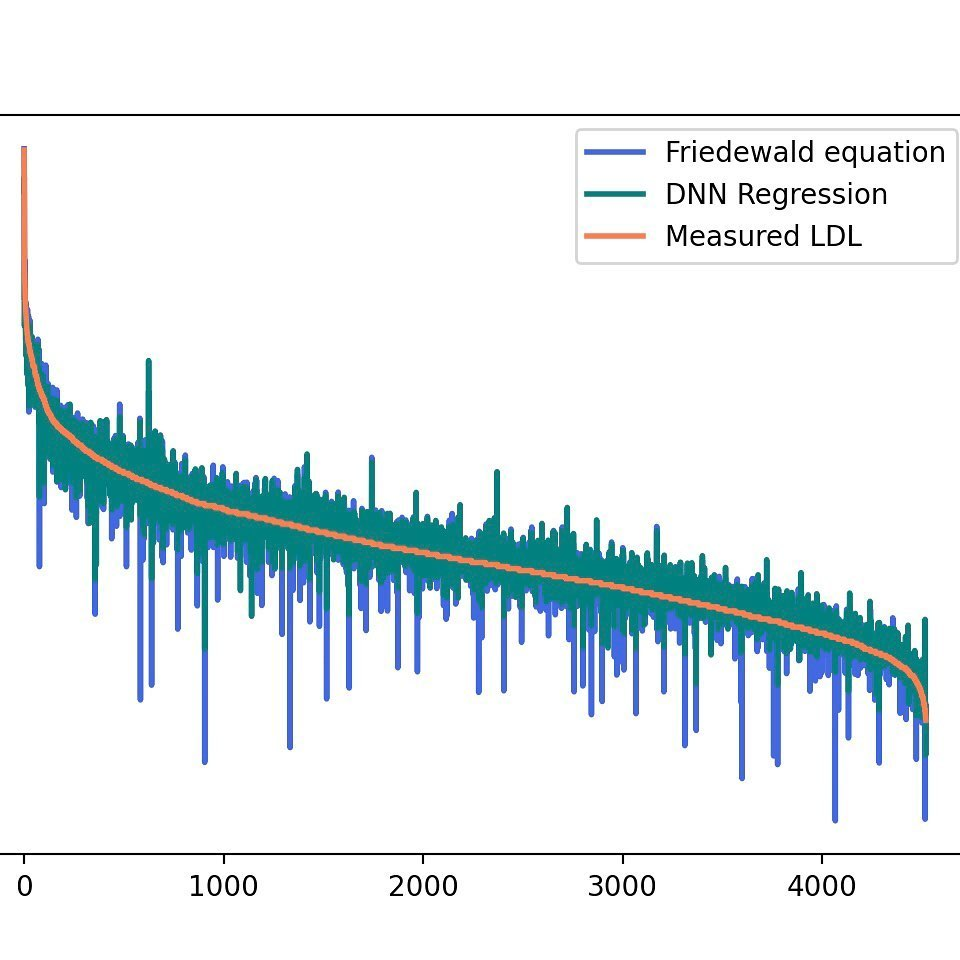

In [4]:
Image(filename='compare.jpeg', width=500)

By upper image, the result of DNN regression is more similar like real data than Friedewald equation

### Transfer Learning

By below images, the result of TL (Transfer-learning) is accurater than normal learning 

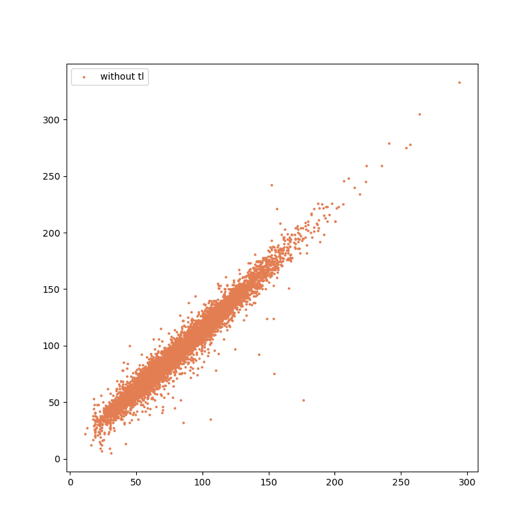

In [5]:
Image(filename='without tl.png', width=500)

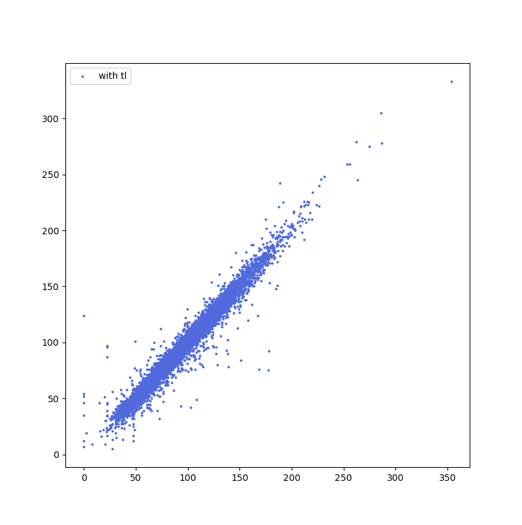

In [6]:
Image(filename='with tl.png', width=500)

## References
[Tensorflow](https://www.tensorflow.org/)  
[DNN architecture to predict](https://sciencedirect.com/science/article/abs/pii/S000989811830603X)